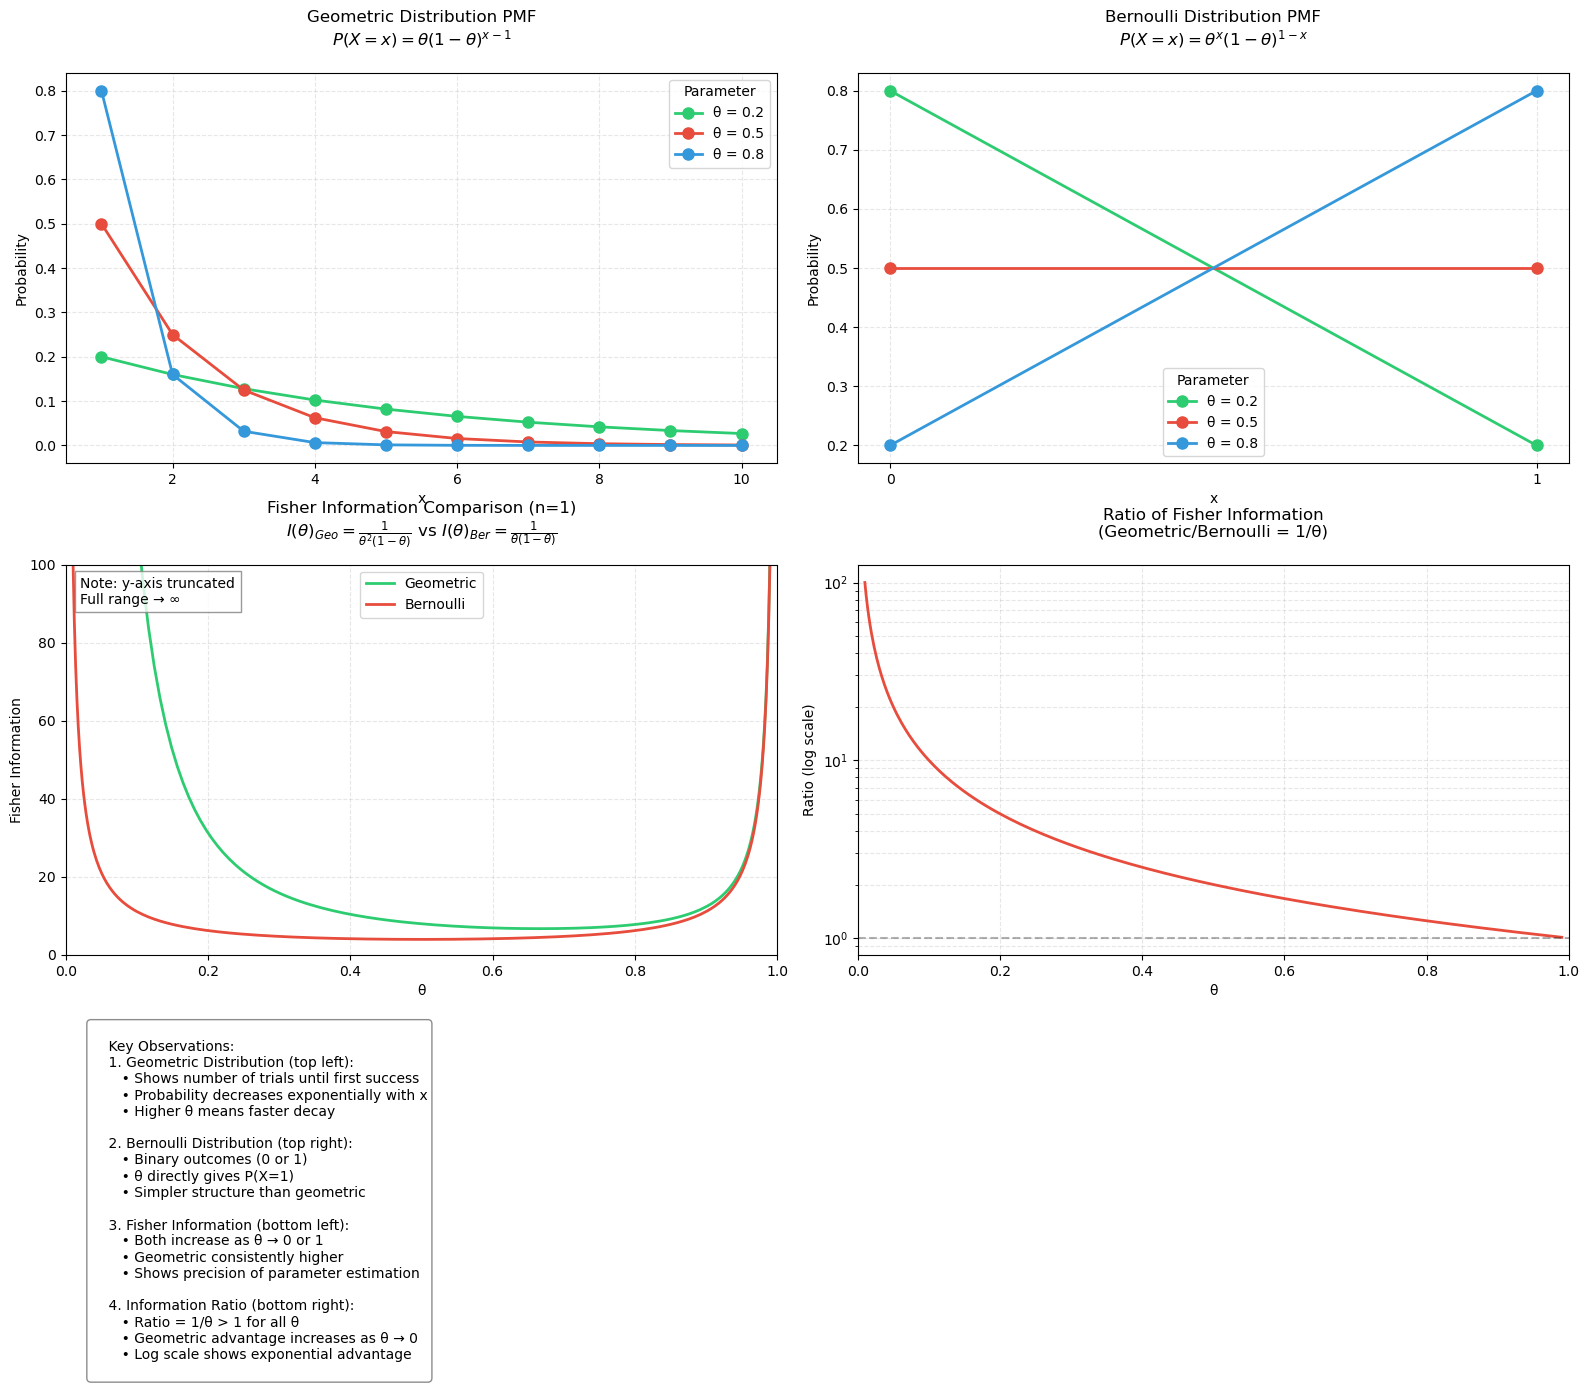

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, geom
from matplotlib.gridspec import GridSpec

def plot_distributions_and_fisher():
    # Set style for better visualization
    
    
    # Create figure with custom layout
    fig = plt.figure(figsize=(16, 12))
    gs = GridSpec(2, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    
    # Color scheme
    colors = ['#2ecc71', '#e74c3c', '#3498db']
    
    # Define theta values with higher resolution near boundaries
    theta_values = np.concatenate([
        np.linspace(0.01, 0.1, 50),
        np.linspace(0.1, 0.9, 100),
        np.linspace(0.9, 0.99, 50)
    ])
    
    # Plot 1: Geometric Distribution
    x_geom = np.arange(1, 11)
    theta_examples = [0.2, 0.5, 0.8]
    
    for theta, color in zip(theta_examples, colors):
        pmf = geom.pmf(x_geom, theta)
        ax1.plot(x_geom, pmf, 'o-', color=color, label=f'θ = {theta:.1f}',
                markersize=8, linewidth=2)
    
    ax1.set_title('Geometric Distribution PMF\n$P(X=x) = θ(1-θ)^{x-1}$', 
                 fontsize=12, pad=20)
    ax1.set_xlabel('x', fontsize=10)
    ax1.set_ylabel('Probability', fontsize=10)
    ax1.legend(title='Parameter', title_fontsize=10)
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.set_xlim(0.5, 10.5)
    
    # Plot 2: Bernoulli Distribution
    x_bern = np.array([0, 1])
    
    for theta, color in zip(theta_examples, colors):
        pmf = bernoulli.pmf(x_bern, theta)
        ax2.plot(x_bern, pmf, 'o-', color=color, label=f'θ = {theta:.1f}',
                markersize=8, linewidth=2)
    
    ax2.set_title('Bernoulli Distribution PMF\n$P(X=x) = θ^x(1-θ)^{1-x}$', 
                 fontsize=12, pad=20)
    ax2.set_xlabel('x', fontsize=10)
    ax2.set_ylabel('Probability', fontsize=10)
    ax2.legend(title='Parameter', title_fontsize=10)
    ax2.grid(True, alpha=0.3, linestyle='--')
    ax2.set_xticks([0, 1])
    
    # Plot 3: Fisher Information Comparison
    n = 1  # sample size
    I_geometric = n / (theta_values**2 * (1 - theta_values))
    I_bernoulli = n / (theta_values * (1 - theta_values))
    
    ax3.plot(theta_values, I_geometric, label='Geometric', color='#2ecc71', linewidth=2)
    ax3.plot(theta_values, I_bernoulli, label='Bernoulli', color='#e74c3c', linewidth=2)
    ax3.set_title('Fisher Information Comparison (n=1)\n$I(θ)_{Geo} = \\frac{1}{θ^2(1-θ)}$ vs $I(θ)_{Ber} = \\frac{1}{θ(1-θ)}$', 
                 fontsize=12, pad=20)
    ax3.set_xlabel('θ', fontsize=10)
    ax3.set_ylabel('Fisher Information', fontsize=10)
    ax3.legend(fontsize=10)
    ax3.grid(True, alpha=0.3, linestyle='--')
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 100)  # Limit y-axis for better visibility
    
    # Add text about truncated y-axis
    ax3.text(0.02, 90, "Note: y-axis truncated\nFull range → ∞", 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
    
    # Plot 4: Ratio of Fisher Information
    ratio = I_geometric / I_bernoulli
    ax4.semilogy(theta_values, ratio, color='#e74c3c', linewidth=2)
    ax4.set_title('Ratio of Fisher Information\n(Geometric/Bernoulli = 1/θ)', 
                 fontsize=12, pad=20)
    ax4.set_xlabel('θ', fontsize=10)
    ax4.set_ylabel('Ratio (log scale)', fontsize=10)
    ax4.axhline(y=1, color='k', linestyle='--', alpha=0.3)
    ax4.grid(True, which="both", alpha=0.3, linestyle='--')
    ax4.set_xlim(0, 1)
    
    # Adjust layout
    plt.tight_layout()
    
    # Add comprehensive explanation
    explanation = """
    Key Observations:
    1. Geometric Distribution (top left):
       • Shows number of trials until first success
       • Probability decreases exponentially with x
       • Higher θ means faster decay
    
    2. Bernoulli Distribution (top right):
       • Binary outcomes (0 or 1)
       • θ directly gives P(X=1)
       • Simpler structure than geometric
    
    3. Fisher Information (bottom left):
       • Both increase as θ → 0 or 1
       • Geometric consistently higher
       • Shows precision of parameter estimation
    
    4. Information Ratio (bottom right):
       • Ratio = 1/θ > 1 for all θ
       • Geometric advantage increases as θ → 0
       • Log scale shows exponential advantage
    """
    
    plt.figtext(0.06, -0.15, explanation, fontsize=10,
                bbox=dict(facecolor='white', alpha=0.9, 
                         edgecolor='gray', boxstyle='round'))
    
    # Adjust figure size to accommodate text
    plt.subplots_adjust(bottom=0.2)
    plt.show()

# Create the plots
plot_distributions_and_fisher()